# Dataset Visualization and Preprocessing

This document provides an overview of the dataset used in this project, along with visualization techniques and preprocessing steps applied to prepare the data for analysis and modeling.

## Data Loading and Organization

Let us start by specifying the base path to the dataset and importing necessary libraries.

In [1]:
import os
import sys

In [2]:
BASE_PATH = r'C:\Users\JTWit\Documents\ECE 579\Datasets\GTZAN Dataset'
AUDIO_PATH = os.path.join(BASE_PATH,"genres_original")
IMAGES_PATH = os.path.join(BASE_PATH,"images_original")


Let's take a look at what is inside each of the subfolders.

In [ ]:
for root, dirs, files in os.walk(BASE_PATH):
    print(f"--- Current Directory (Root): {root}")
    
    print("  - Subdirectories (Dirs):")
    for dir_name in dirs:
        full_dir_path = os.path.join(root, dir_name)
        print(f"    * {full_dir_path}")

    print("  - Files (Files):")
    for file_name in files:
        full_file_path = os.path.join(root, file_name)
        print(f"    * {full_file_path}")

The dataset is organized into two subfolders: genres original and images original. The genres original folder contains audio files categorized by genre, while the images original folder contains spectrogram images corresponding to those audio files.

Let's set up a dictionary for the mel spectrogram parameters that will be used later for audio processing.

In [25]:
images = {}
for root, dirs, files in os.walk(IMAGES_PATH):
    for dir in dirs:
        path = os.path.join(root,dir) 
        temp_files = list(os.listdir(path))
        temp_dict = {"path":path, "samples":temp_files}
        images[dir] = temp_dict
        

Let's visualize the dictionary to confirm the parameters are set correctly.

In [ ]:
for key in images.keys():
    print(f"Class: {key}")
    print(f"Base path: {images[key]['path']}")
    print(f"Images: {images[key]['samples']}")
    print("-"*100)

Now let's do the same with the audio data so we can easily reference these parameters later in the project.

In [4]:
audios = {}
for root, dirs, files in os.walk(AUDIO_PATH):
    for dir in dirs:
        path = os.path.join(root,dir) 
        temp_files = list(os.listdir(path))
        temp_dict = {"path":path, "samples":temp_files}
        audios[dir] = temp_dict
        

Like before, we will visualize the audio parameters dictionary to ensure everything is set up correctly.

In [28]:
for key in audios.keys():
    print(f"Class: {key}")
    print(f"Base path: {audios[key]['path']}")
    print(f"audio files: {audios[key]['samples']}")
    print("-"*100)

Class: blues
Base path: C:\Users\JTWit\Documents\ECE 579\Datasets\GTZAN Dataset\genres_original\blues
audio files: ['blues.00000.wav', 'blues.00001.wav', 'blues.00002.wav', 'blues.00003.wav', 'blues.00004.wav', 'blues.00005.wav', 'blues.00006.wav', 'blues.00007.wav', 'blues.00008.wav', 'blues.00009.wav', 'blues.00010.wav', 'blues.00011.wav', 'blues.00012.wav', 'blues.00013.wav', 'blues.00014.wav', 'blues.00015.wav', 'blues.00016.wav', 'blues.00017.wav', 'blues.00018.wav', 'blues.00019.wav', 'blues.00020.wav', 'blues.00021.wav', 'blues.00022.wav', 'blues.00023.wav', 'blues.00024.wav', 'blues.00025.wav', 'blues.00026.wav', 'blues.00027.wav', 'blues.00028.wav', 'blues.00029.wav', 'blues.00030.wav', 'blues.00031.wav', 'blues.00032.wav', 'blues.00033.wav', 'blues.00034.wav', 'blues.00035.wav', 'blues.00036.wav', 'blues.00037.wav', 'blues.00038.wav', 'blues.00039.wav', 'blues.00040.wav', 'blues.00041.wav', 'blues.00042.wav', 'blues.00043.wav', 'blues.00044.wav', 'blues.00045.wav', 'blues.000

## Visualizing Sample Spectrograms

We can also visualize some of the spectrogram images from the dataset to get a better understanding of the data.

In [31]:
import matplotlib.pyplot as plt

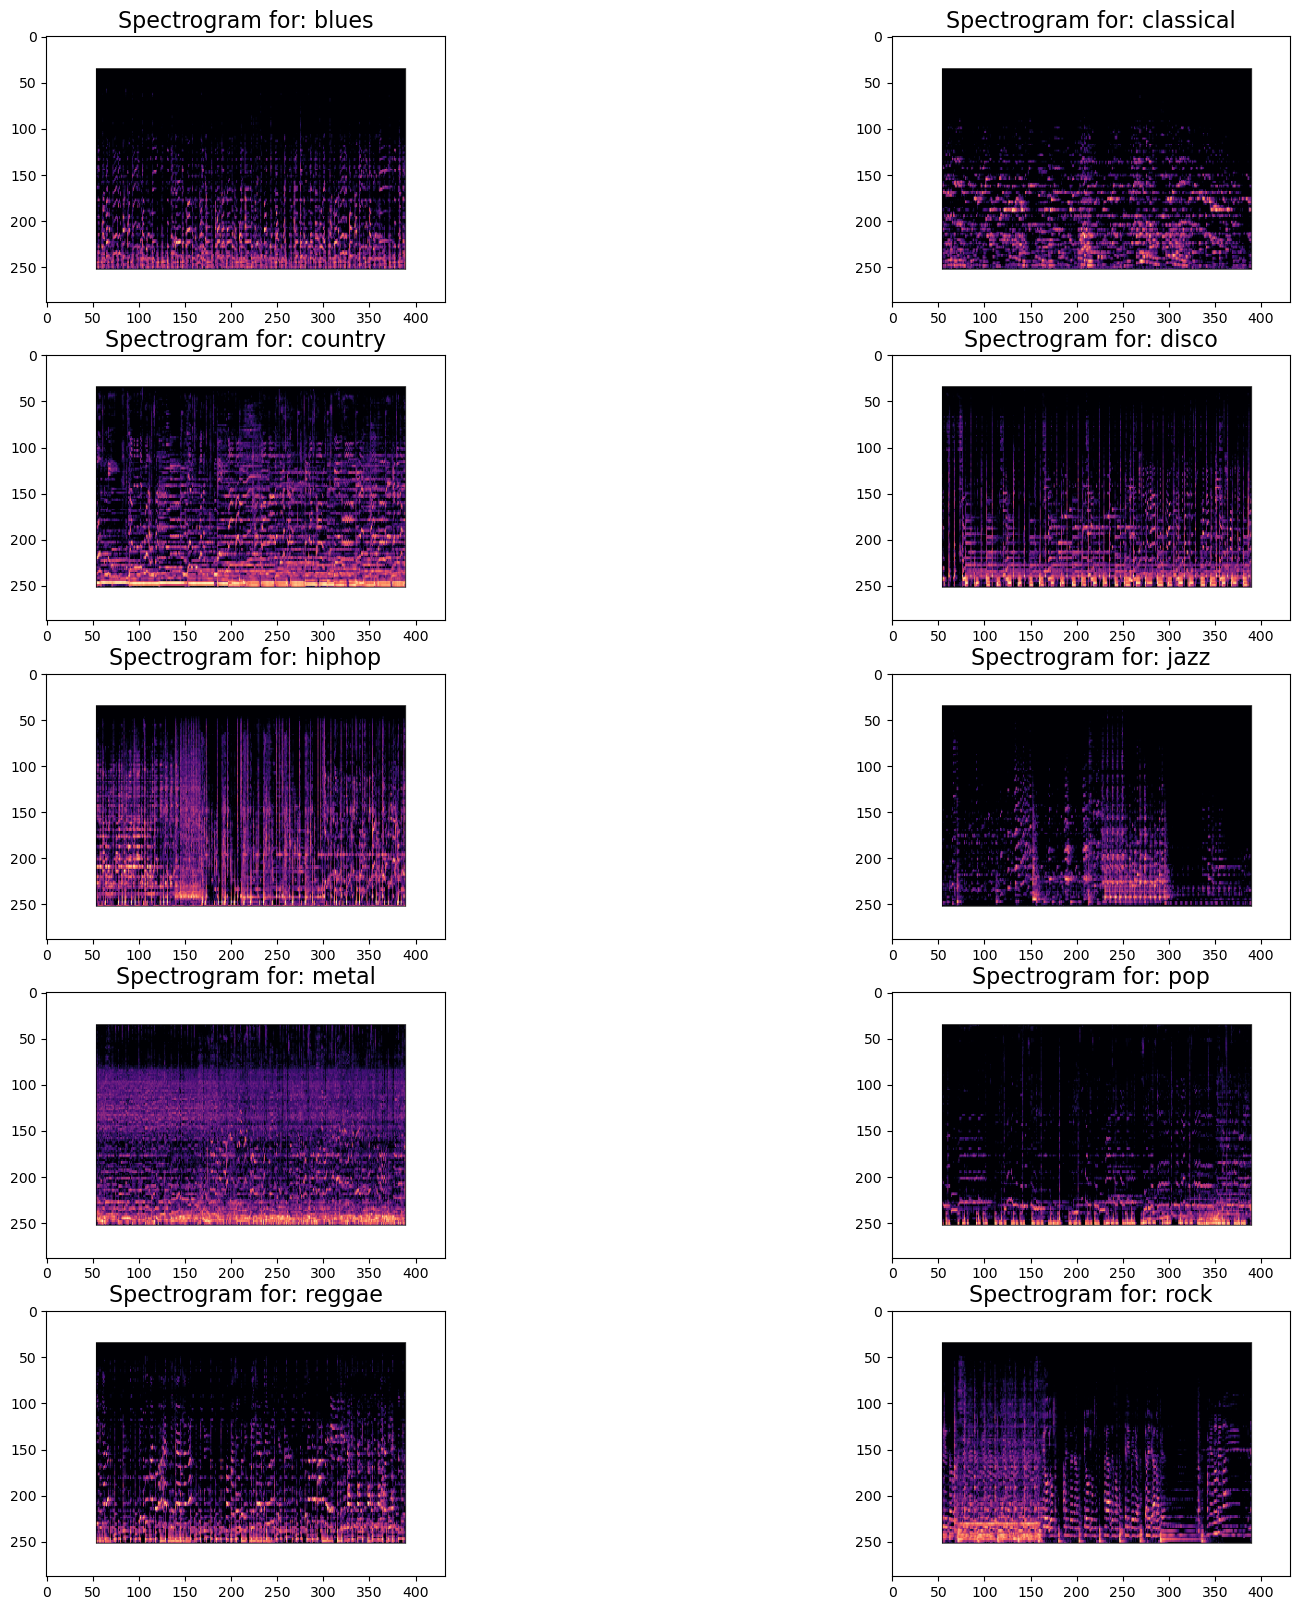

In [50]:
plt.figure(figsize=(20,20))
for i,key in enumerate(images.keys()):
    first_sample = os.path.join(images[key]['path'],images[key]['samples'][0])
    
    mel_spect = plt.imread(first_sample)

    plt.subplot(5,2,i+1)
    plt.title(f"Spectrogram for: {key}",fontsize=16)
    plt.imshow(mel_spect)

## Visualizing Sample Audio Files

In [44]:
import wave
import matplotlib.pyplot as plt
import numpy as np

Now that we have a method that allows us to visualize the wav files we can take a look at some samples from the dataset.

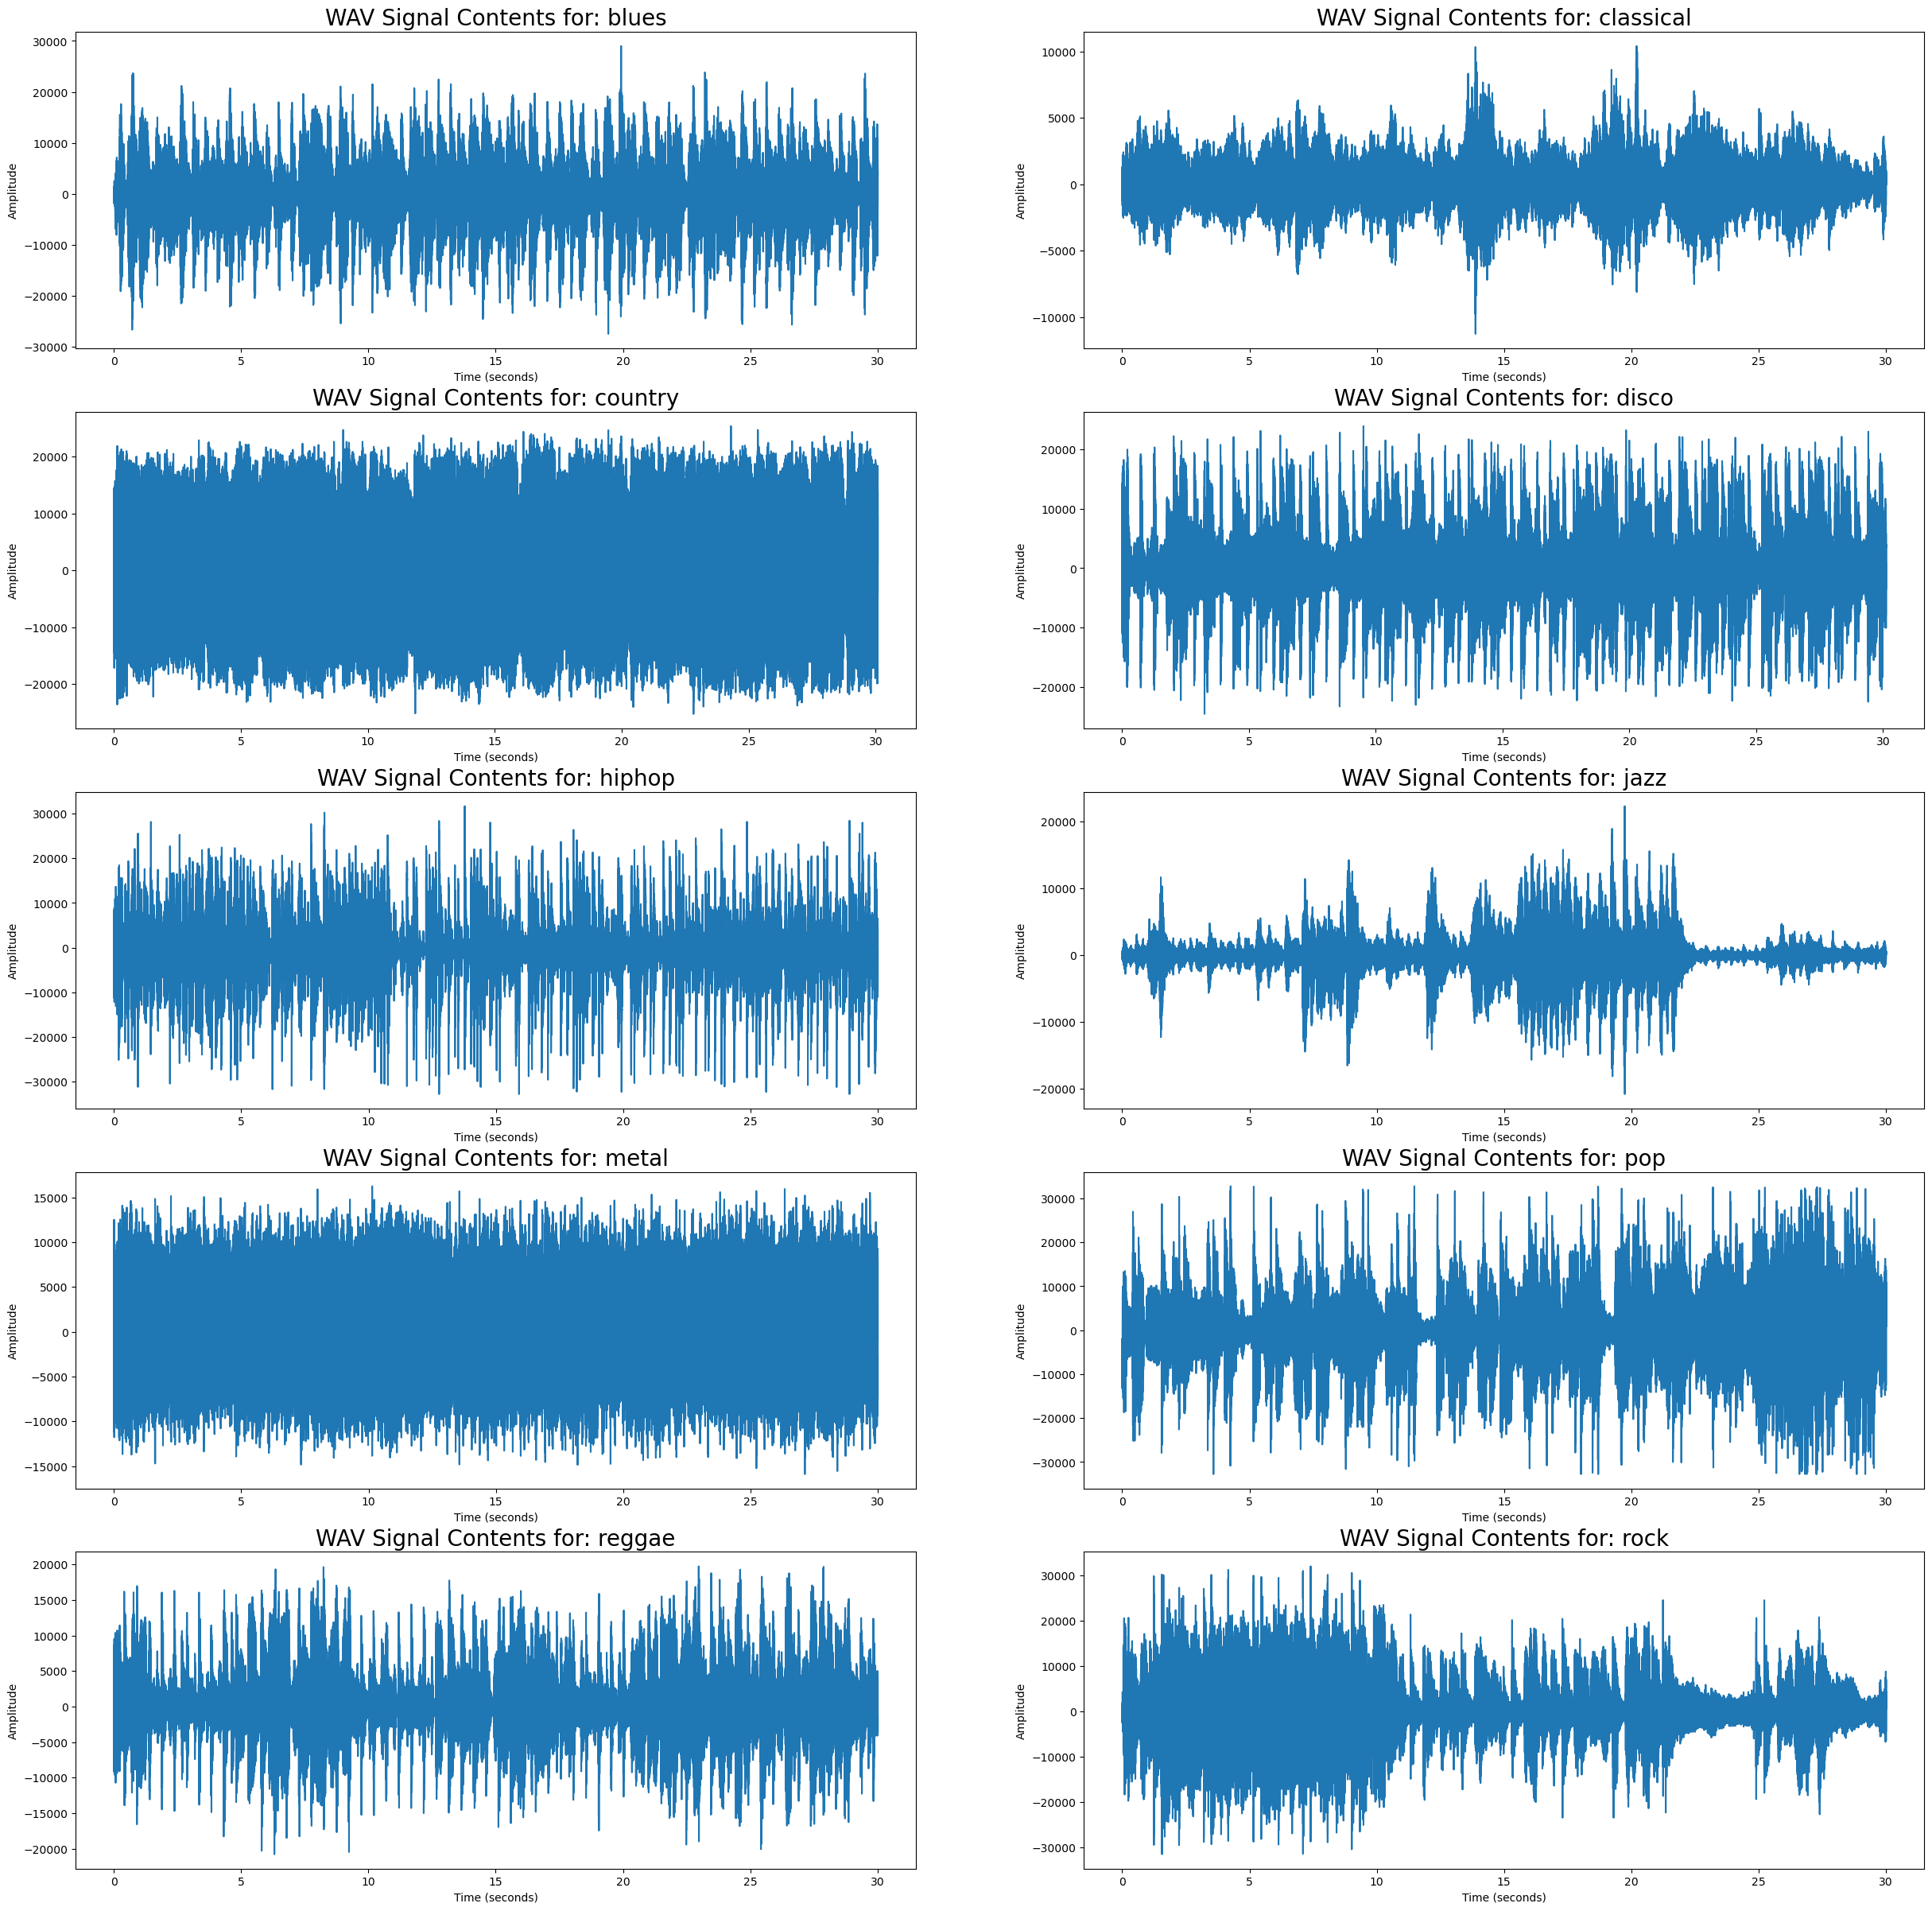

In [53]:
plt.figure(figsize=(30, 30))
for i,key in enumerate(audios.keys()):
    first_sample = os.path.join(audios[key]['path'],audios[key]['samples'][0])
    
    with wave.open(first_sample, 'r') as spf:
        # Extract Raw Audio from Wav File
        signal = spf.readframes(-1)
        # Use np.frombuffer instead of the deprecated np.fromstring
        signal = np.frombuffer(signal, dtype=np.int16)

        # Get audio parameters
        fs = spf.getframerate()
        nchannels = spf.getnchannels()

    
    # Handle stereo files by using only one channel for a simple waveform plot
    if nchannels == 2:
        print("Stereo file detected. Using the left channel only.")
        # Select left channel only
        signal = signal[0::2]
    
    time = np.linspace(0, len(signal) / fs, num=len(signal))

    

    plt.subplot(5,2,i+1)
    plt.plot(time, signal)
    plt.title(f"WAV Signal Contents for: {key}",fontsize=20)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    

We could also plot the spectra of the audio files to see their total frequency content.

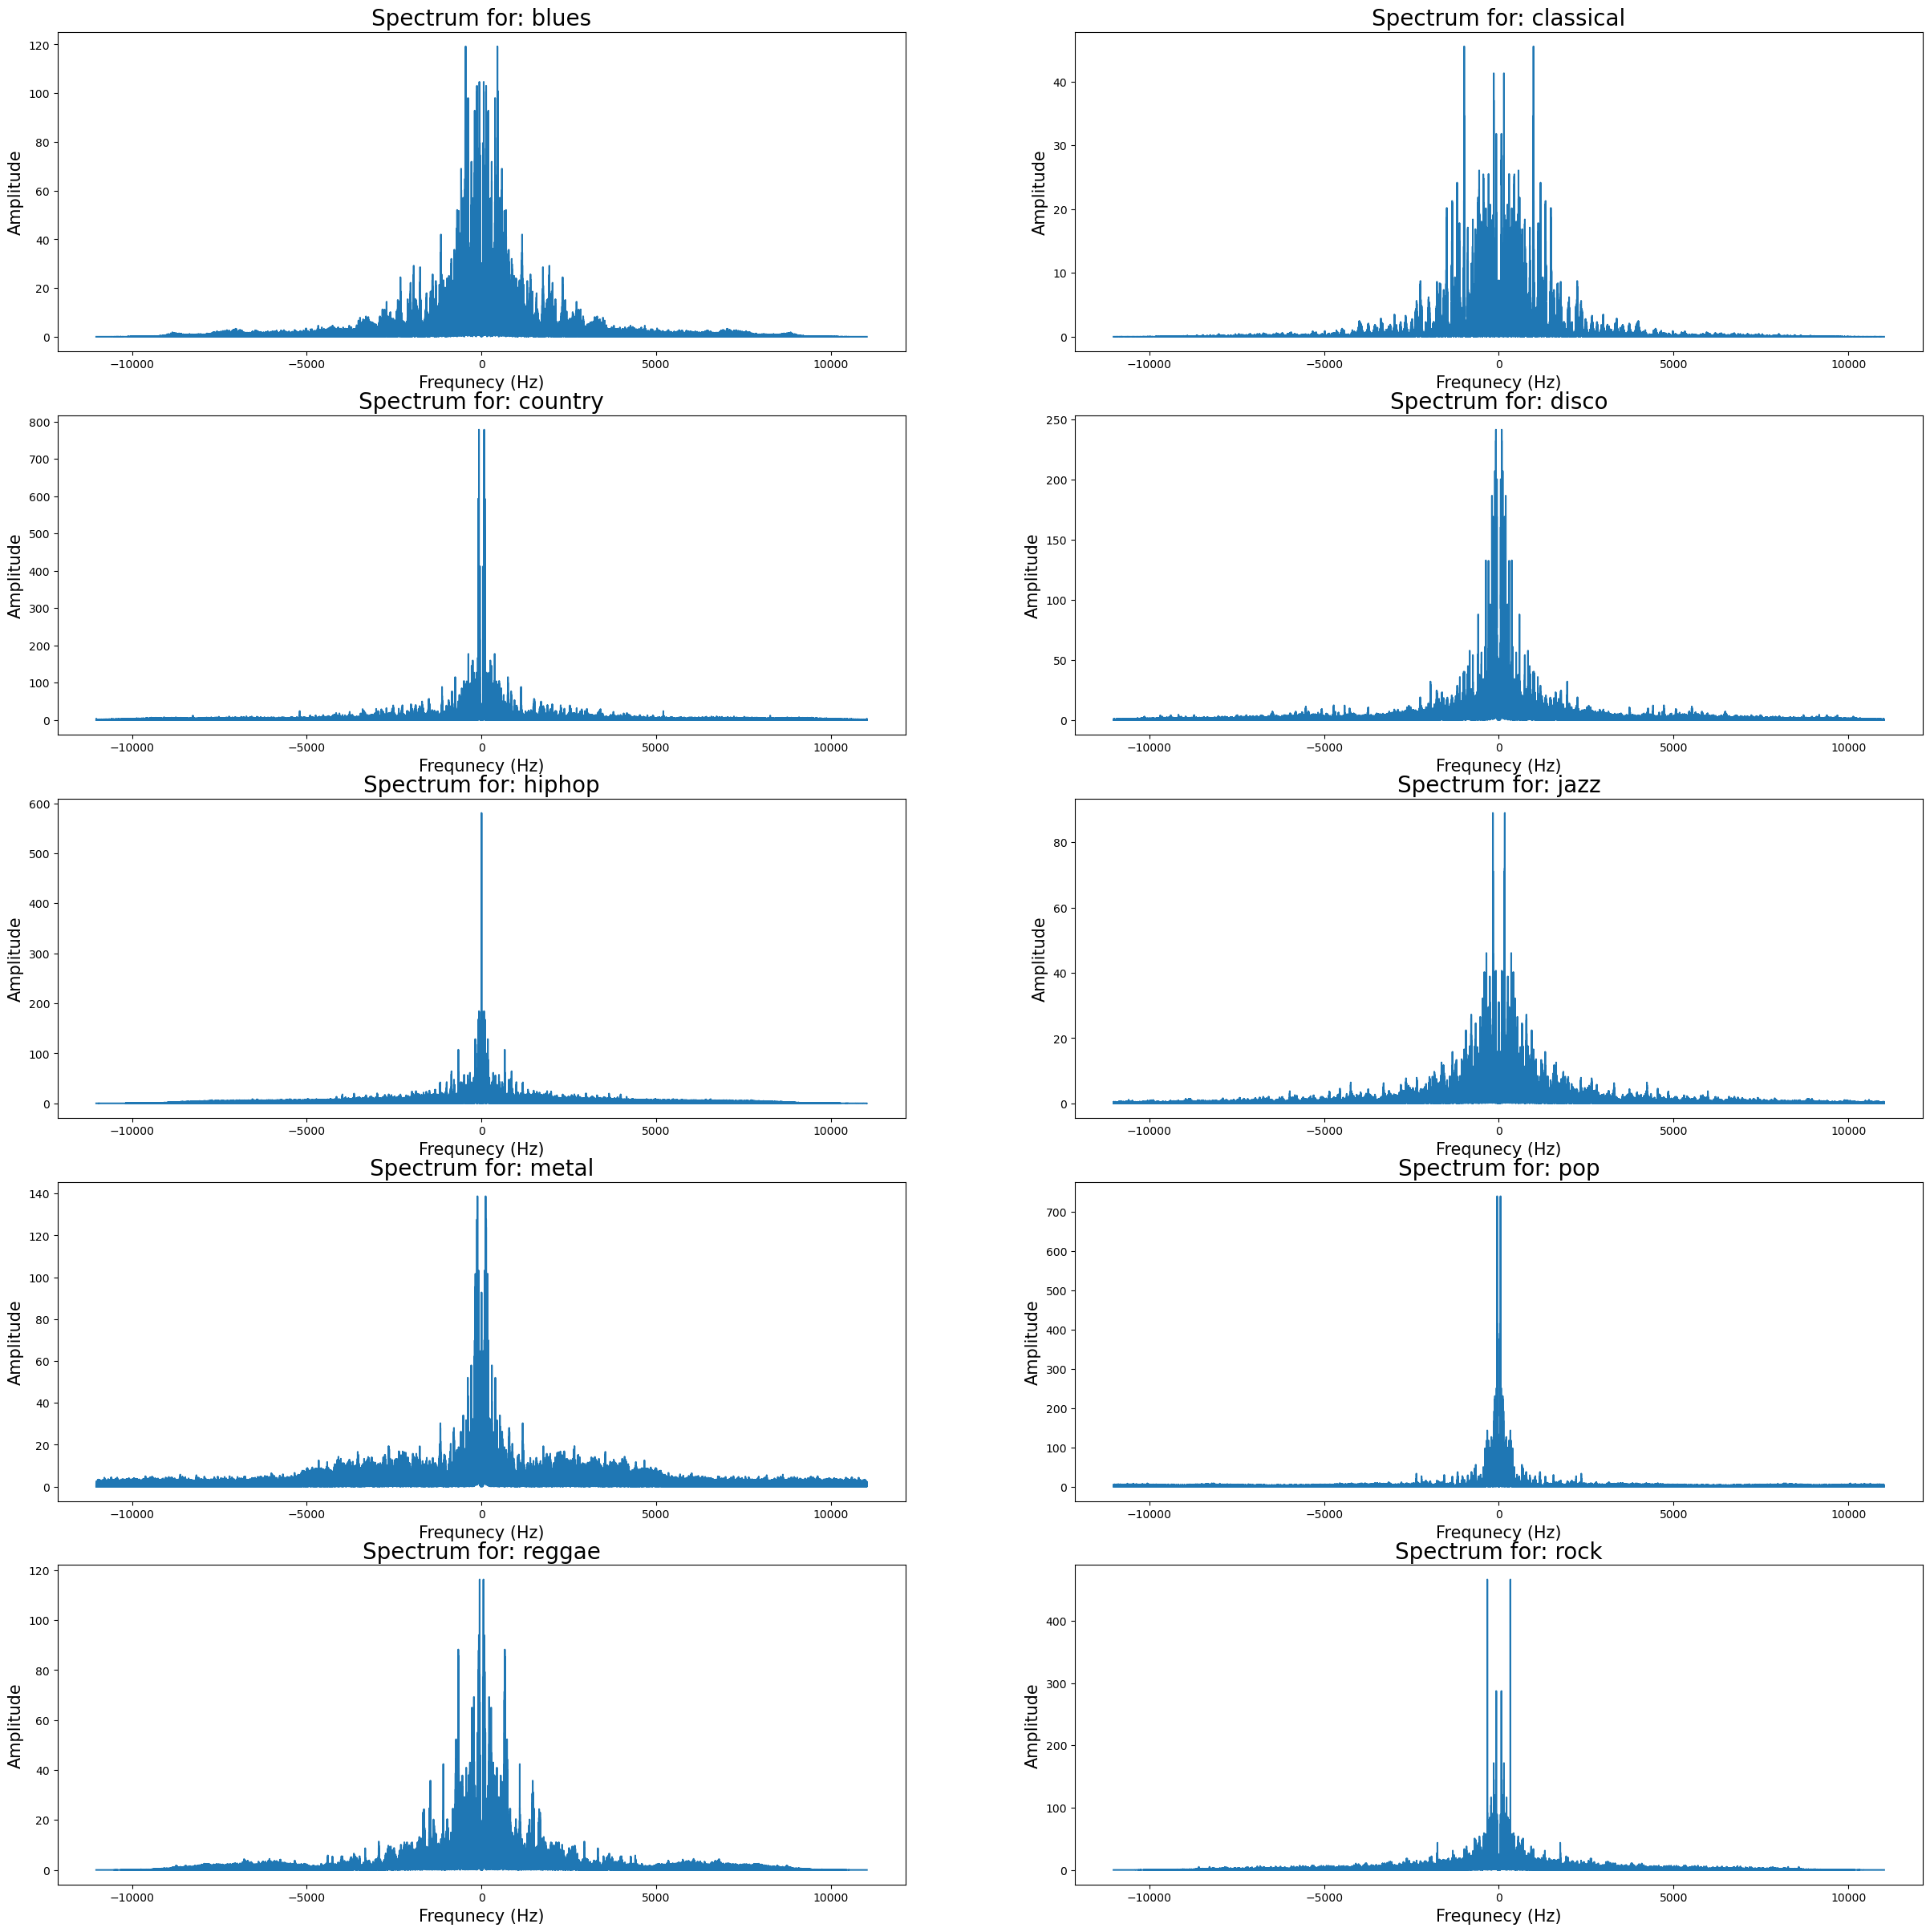

In [61]:
plt.figure(figsize=(30, 30))
for i,key in enumerate(audios.keys()):
    first_sample = os.path.join(audios[key]['path'],audios[key]['samples'][0])
    
    with wave.open(first_sample, 'r') as spf:
        # Extract Raw Audio from Wav File
        signal = spf.readframes(-1)
        # Use np.frombuffer instead of the deprecated np.fromstring
        signal = np.frombuffer(signal, dtype=np.int16)

        # Get audio parameters
        fs = spf.getframerate()
        nchannels = spf.getnchannels()

    
    # Handle stereo files by using only one channel for a simple waveform plot
    if nchannels == 2:
        print("Stereo file detected. Using the left channel only.")
        # Select left channel only
        signal = signal[0::2]
    

    S = np.fft.fftshift(np.fft.fft(signal))
    S = S / len(S)

    f = np.fft.fftshift(np.fft.fftfreq(len(S), d = 1/fs))

    plt.subplot(5,2,i+1)
    plt.plot(f, abs(S))
    plt.title(f"Spectrum for: {key}",fontsize=20)
    plt.xlabel("Frequnecy (Hz)",fontsize=15)
    plt.ylabel("Amplitude",fontsize=15)
    

We can also play some of the audio files to get a better sense of the data.

In [ ]:
import winsound

In [13]:
for i,key in enumerate(audios.keys()):
    first_sample = os.path.join(audios[key]['path'],audios[key]['samples'][0])

    winsound.PlaySound(first_sample, winsound.SND_FILENAME)

## Features CSV File Overview

These parameters were extracted from using the librosa library in Python and saved into a CSV file for easier access during model training and evaluation. The CSV file contains various audio features such as tempo, spectral centroid, zero-crossing rate, and MFCCs (Mel-frequency cepstral coefficients), among others. Each row in the CSV file corresponds to an audio file in the dataset, and each column represents a specific feature extracted from that audio file.

In [14]:
import os
import pandas as pd

In [15]:
features_3 = os.path.join(BASE_PATH,"features_3_sec.csv")
features_30 = os.path.join(BASE_PATH,"features_30_sec.csv")

In [18]:
df_3 = pd.read_csv(features_3)
df_30 = pd.read_csv(features_30)

print("Features 3 seconds csv contents")
print(df_3.head())

Features 3 seconds csv contents
            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.

In [19]:
print("Features 30 seconds csv contents")
print(df_30.head())

Features 30 seconds csv contents
          filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1

### Librosa Demo

#### Audio Feature Descriptions

This document explains common audio features extracted from time-domain and frequency-domain analysis, typically using libraries such as Librosa.
For features with mean and var, the statistic is computed over all frames of the audio signal.

##### 1. Chroma Features

Chroma features represent the energy of the 12 pitch classes (C, C♯, …, B), independent of octave.

chroma_stft_mean
Mean chroma energy across all pitch classes and time frames.

chroma_stft_var
Variance of chroma energy, measuring harmonic variability.

##### 2. Root Mean Square (RMS) Energy

RMS measures the short-term signal energy, related to perceived loudness.

rms_mean
Average loudness of the audio.

rms_var
Loudness variation over time.

##### 3. Spectral Centroid

The spectral centroid indicates where the “center of mass” of the spectrum lies.

spectral_centroid_mean
Average brightness of the sound.

spectral_centroid_var
Brightness variability over time.

##### 4. Spectral Bandwidth

Spectral bandwidth measures how spread out the frequencies are around the centroid.

spectral_bandwidth_mean
Average spectral spread.

spectral_bandwidth_var
Variability in spectral spread.

##### 5. Spectral Rolloff

The rolloff frequency below which a specified percentage (typically 85%) of spectral energy is contained.

rolloff_mean
Average rolloff frequency (higher → more high-frequency content).

rolloff_var
Variation in rolloff frequency.

##### 6. Zero-Crossing Rate (ZCR)

ZCR measures how often the signal crosses zero amplitude.

zero_crossing_rate_mean
Average noisiness or percussiveness.

zero_crossing_rate_var
Temporal variation of signal noisiness.

##### 7. Harmonic Component

Represents the harmonic (tonal) part of the signal after separating harmonic and percussive components.

harmony_mean
Average harmonic energy.

harmony_var
Variation in harmonic content.

##### 8. Percussive Component

Represents the percussive (transient) part of the signal.

perceptr_mean
Average percussive energy.

perceptr_var
Variation in percussive content.

##### 9. Tempo

tempo
Estimated tempo of the audio in beats per minute (BPM).

##### 10. Mel-Frequency Cepstral Coefficients (MFCCs)

MFCCs describe the spectral envelope of the sound and are widely used in speech and music classification.

Each MFCC captures different spectral characteristics:

Lower-order MFCCs → overall spectral shape

Higher-order MFCCs → fine spectral details

For each coefficient:

MFCC 1–20

mfccX_mean
Mean value of MFCC coefficient X across time.

mfccX_var
Variance of MFCC coefficient X, indicating temporal variability.

Where X = 1, 2, …, 20.

Examples:

mfcc1_mean, mfcc1_var → overall spectral slope

mfcc2–5 → timbral shape

mfcc6–20 → finer spectral texture

In [5]:
import librosa
import pandas as pd
import numpy as np

In [6]:
def get_librosa_parameters(path_to_file:str) ->pd.DataFrame:

    y, sr = librosa.load(path_to_file)
    # 2. Compute Features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

    # 3. Calculate Means and Variances
    features = {
        "chroma_stft_mean": np.mean(chroma_stft),
        "chroma_stft_var": np.var(chroma_stft),
        "rms_mean": np.mean(rms),
        "rms_var": np.var(rms),
        "spectral_centroid_mean": np.mean(spectral_centroid),
        "spectral_centroid_var": np.var(spectral_centroid),
        "spectral_bandwidth_mean": np.mean(spectral_bandwidth),
        "spectral_bandwidth_var": np.var(spectral_bandwidth),
        "rolloff_mean": np.mean(rolloff),
        "rolloff_var": np.var(rolloff),
        "zero_crossing_rate_mean": np.mean(zcr),
        "zero_crossing_rate_var": np.var(zcr),
        "harmony_mean": np.mean(y_harmonic),
        "harmony_var": np.var(y_harmonic),
        "perceptr_mean": np.mean(y_percussive),
        "perceptr_var": np.var(y_percussive),
        "tempo": tempo,
    }

    mfcc_means = np.mean(mfccs, axis=1)
    mfcc_vars = np.var(mfccs, axis=1)

    for i in range(20):
        features[f"mfcc{i+1}_mean"] = mfcc_means[i]
        features[f"mfcc{i+1}_var"] = mfcc_vars[i]

    # 4. Convert to pandas DataFrame (one row per file)
    df = pd.DataFrame([features])
    
    return df

Test the parameters set in the librosa dictionary to ensure they work as expected.

In [7]:
for key in audios.keys():
    first_sample = os.path.join(audios[key]['path'],audios[key]['samples'][0])
    df = get_librosa_parameters(first_sample)
    print(f"Librosa parameters for: {key}")
    print(df.head())

Librosa parameters for: blues
   chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0          0.350129         0.088772  0.130184  0.002828   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1784.122641          129745.484419              2002.412407   

   spectral_bandwidth_var  rolloff_mean    rolloff_var  ...  mfcc16_mean  \
0            85834.410406    3805.72303  901252.916706  ...     0.751707   

   mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var mfcc19_mean  \
0   52.424534    -1.687854   36.535862     -0.40873   41.603168   -2.302677   

   mfcc19_var  mfcc20_mean  mfcc20_var  
0   55.053654     1.222467   46.941353  

[1 rows x 57 columns]
Librosa parameters for: classical
   chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0          0.252361         0.084149  0.036233  0.000221   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0              1505.35746           44430.732